In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Netflix Dataset.csv")

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.head()

Shape of dataset: (7789, 11)

Column names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,01-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [5]:
df.fillna("Unknown", inplace=True)

In [6]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [8]:
print("\nSummary of data:")
print(df.describe())


Summary of data:
       Show_Id Category              Title Director     Cast        Country  \
count     7789     7789               7789     7789     7789           7789   
unique    7787        2               7787     4051     6832            682   
top      s6621    Movie  The Lost Okoroshi  Unknown  Unknown  United States   
freq         2     5379                  2     2388      718           2556   

       Release_Date Rating  Duration           Type  \
count          7789   7789      7789           7789   
unique         1566     15       216            492   
top       01-Jan-20  TV-MA  1 Season  Documentaries   
freq            118   2865      1608            334   

                                              Description  
count                                                7789  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  


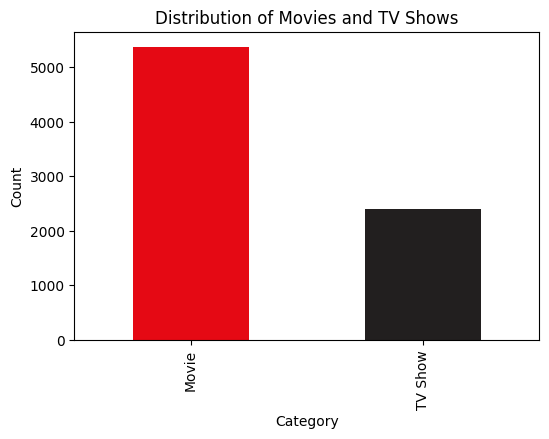

In [9]:
plt.figure(figsize=(6,4))
df['Category'].value_counts().plot(kind='bar', color=['#E50914','#221f1f'])
plt.title("Distribution of Movies and TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

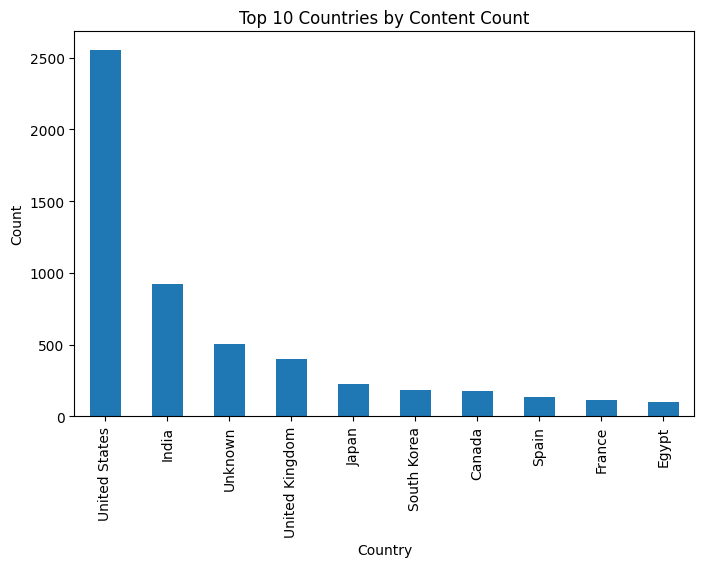

In [10]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

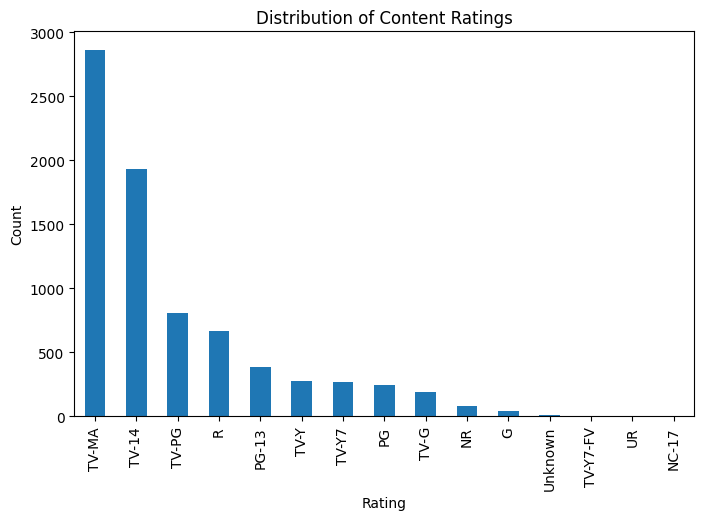

In [11]:
plt.figure(figsize=(8,5))
df['Rating'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2470630476.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


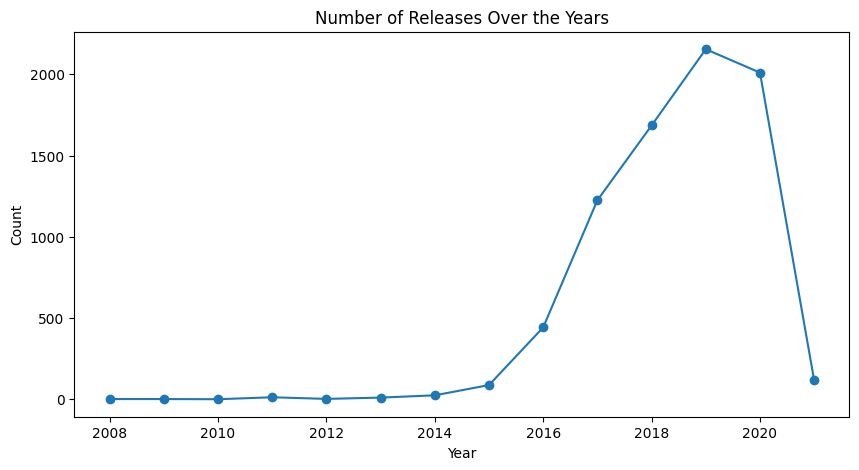

In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

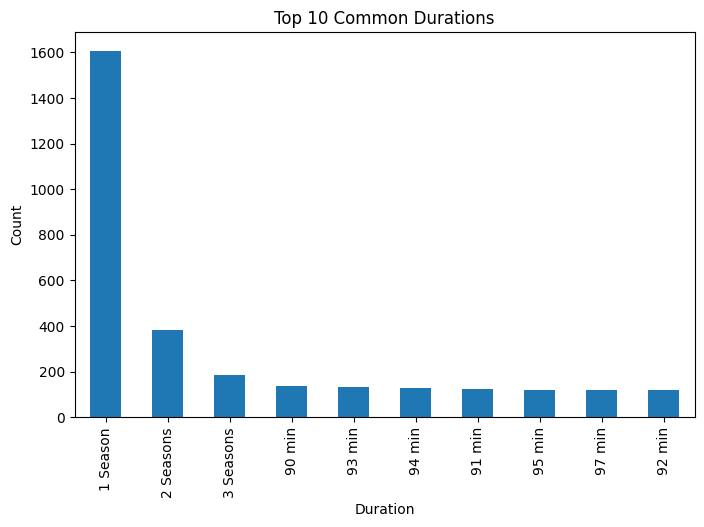

In [13]:
plt.figure(figsize=(8,5))
df['Duration'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Common Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

In [15]:
top_directors = df[df['Director'] != "Unknown"]['Director'].value_counts().head(10)
print("\nTop 10 Directors with Most Titles:")
print(top_directors)


Top 10 Directors with Most Titles:
Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64


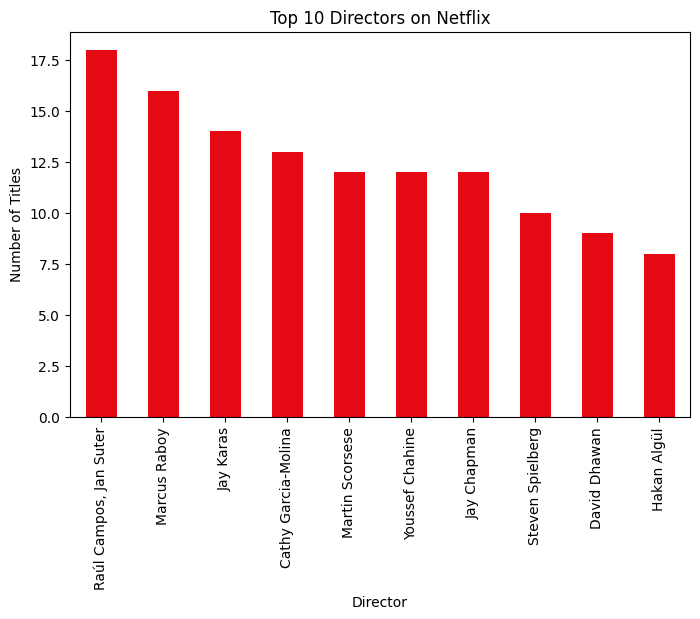

In [16]:
plt.figure(figsize=(8,5))
top_directors.plot(kind='bar', color='#E50914')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()


Top 10 Actors with Most Titles:
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Yuki Kaji           27
Paresh Rawal        27
Amitabh Bachchan    27
Boman Irani         27
dtype: int64


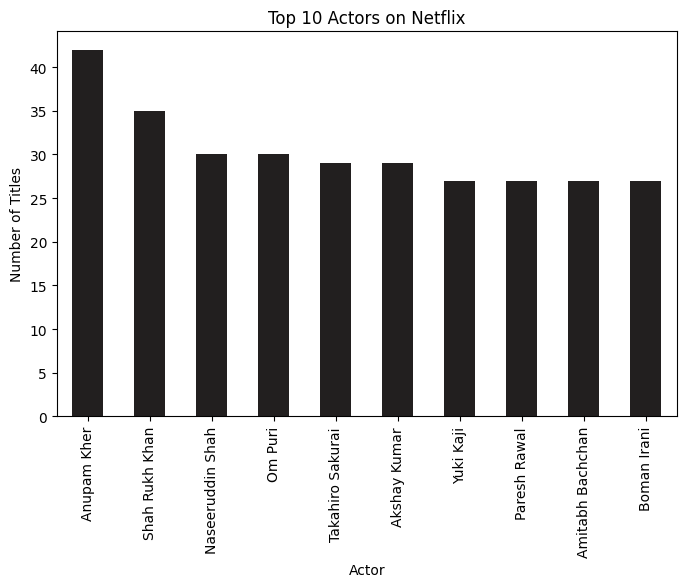

In [17]:
from collections import Counter

actor_list = df[df['Cast'] != "Unknown"]['Cast'].str.split(',')
actors = [actor.strip() for sublist in actor_list.dropna() for actor in sublist]
top_actors = pd.Series(Counter(actors)).sort_values(ascending=False).head(10)

print("\nTop 10 Actors with Most Titles:")
print(top_actors)
plt.figure(figsize=(8,5))
top_actors.plot(kind='bar', color='#221f1f')
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Actor")
plt.ylabel("Number of Titles")
plt.show()
